In [2]:
import pandas as pd
from statistics import variance, stdev
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sensor_a = pd.read_excel('./hw_1_data/HEAT - A_final.xls', skiprows = 3).drop([0])
sensor_b = pd.read_excel('./hw_1_data/HEAT - B_final.xls', skiprows = 3).drop([0])
sensor_c = pd.read_excel('./hw_1_data/HEAT - C_final.xls', skiprows = 3).drop([0])
sensor_d = pd.read_excel('./hw_1_data/HEAT - D_final.xls', skiprows = 3).drop([0])
sensor_e = pd.read_excel('./hw_1_data/HEAT - E_final.xls', skiprows = 3).drop([0])

In [4]:
sensor_a

,FORMATTED DATE-TIME,Direction ‚ True,Wind Speed,Crosswind Speed,Headwind Speed,Temperature,Globe Temperature,Wind Chill,Relative Humidity,Heat Stress Index,Dew Point,Psychro Wet Bulb Temperature,Station Pressure,Barometric Pressure,Altitude,Density Altitude,NA Wet Bulb Temperature,WBGT,TWL,Direction ‚ Mag
1,2020-06-10 00:00:00,327.0,0.7,0.4,0.6,9.9,8.3,9.8,69.9,9.4,4.6,7.3,1021,1021,-66,-234,7.5,7.9,320,327
2,2020-06-10 00:20:00,323.0,0.7,0.4,0.6,9.8,7.8,9.7,70.9,9.3,4.7,7.2,1020.8,1020.7,-64,-235,7.2,7.6,320,322
3,2020-06-10 00:40:00,325.0,0,0,0,9.3,7.7,9.2,73.5,8.9,4.8,7.1,1020.6,1020.5,-63,-251,7.3,7.6,320,325
4,2020-06-10 01:00:00,322.0,0.6,0.4,0.5,9,7.2,9,75.6,8.8,4.9,7,1020.5,1020.5,-62,-260,6.9,7.2,320,321
5,2020-06-10 01:20:00,321.0,0.7,0.4,0.5,9.4,7.3,9.4,74.9,9.1,5.2,7.2,1020.2,1020.2,-60,-240,6.9,7.2,320,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,2020-07-14 07:40:00,140.0,0.8,0.5,-0.7,17.2,17.1,17.2,95.4,17.7,16.5,16.8,1016.8,1016.7,-32,116,16.7,16.8,273.3,140
2473,2020-07-14 08:00:00,144.0,0,0,0,17.6,18.8,17.6,94.8,18.1,16.8,17.1,1016.7,1016.7,-31,132,16.7,17.2,320,144
2474,2020-07-14 08:20:00,141.0,1.3,0.8,-1,17.5,19.8,17.5,95,18,16.7,17,1016.6,1016.5,-29,130,16.9,17.6,320,140
2475,2020-07-14 08:40:00,160.0,1.9,0.7,-1.8,17.6,20.3,17.5,96,18.1,17,17.2,1016.5,1016.5,-29,135,17.1,17.8,320,160


In [5]:
sensor_a.dtypes

FORMATTED DATE-TIME              object
Direction ‚ True                float64
Wind Speed                       object
Crosswind Speed                  object
Headwind Speed                   object
Temperature                      object
Globe Temperature                object
Wind Chill                       object
Relative Humidity                object
Heat Stress Index                object
Dew Point                        object
Psychro Wet Bulb Temperature     object
Station Pressure                 object
Barometric Pressure              object
Altitude                         object
Density Altitude                 object
NA Wet Bulb Temperature          object
WBGT                             object
TWL                              object
Direction ‚ Mag                  object
dtype: object

In [6]:
sensor_a.columns

Index(['FORMATTED DATE-TIME', 'Direction ‚ True', 'Wind Speed',
       'Crosswind Speed', 'Headwind Speed', 'Temperature', 'Globe Temperature',
       'Wind Chill', 'Relative Humidity', 'Heat Stress Index', 'Dew Point',
       'Psychro Wet Bulb Temperature', 'Station Pressure',
       'Barometric Pressure', 'Altitude', 'Density Altitude',
       'NA Wet Bulb Temperature', 'WBGT', 'TWL', 'Direction ‚ Mag'],
      dtype='object')

In [7]:
to_numeric_columns = ['Direction ‚ True', 'Wind Speed',
       'Crosswind Speed', 'Headwind Speed', 'Temperature', 'Globe Temperature',
       'Wind Chill', 'Relative Humidity', 'Heat Stress Index', 'Dew Point',
       'Psychro Wet Bulb Temperature', 'Station Pressure',
       'Barometric Pressure', 'Altitude', 'Density Altitude',
       'NA Wet Bulb Temperature', 'WBGT', 'TWL', 'Direction ‚ Mag']

In [8]:
sensor_a[to_numeric_columns] = sensor_a[to_numeric_columns].apply(pd.to_numeric)
sensor_a['FORMATTED DATE-TIME'] = pd.to_datetime(sensor_a['FORMATTED DATE-TIME'])
sensor_a.set_index('FORMATTED DATE-TIME')

,Direction ‚ True,Wind Speed,Crosswind Speed,Headwind Speed,Temperature,Globe Temperature,Wind Chill,Relative Humidity,Heat Stress Index,Dew Point,Psychro Wet Bulb Temperature,Station Pressure,Barometric Pressure,Altitude,Density Altitude,NA Wet Bulb Temperature,WBGT,TWL,Direction ‚ Mag
FORMATTED DATE-TIME,,,,,,,,,,,,,,,,,,,
2020-06-10 00:00:00,327.0,0.7,0.4,0.6,9.9,8.3,9.8,69.9,9.4,4.6,7.3,1021.0,1021.0,-66,-234,7.5,7.9,320.0,327
2020-06-10 00:20:00,323.0,0.7,0.4,0.6,9.8,7.8,9.7,70.9,9.3,4.7,7.2,1020.8,1020.7,-64,-235,7.2,7.6,320.0,322
2020-06-10 00:40:00,325.0,0.0,0.0,0.0,9.3,7.7,9.2,73.5,8.9,4.8,7.1,1020.6,1020.5,-63,-251,7.3,7.6,320.0,325
2020-06-10 01:00:00,322.0,0.6,0.4,0.5,9.0,7.2,9.0,75.6,8.8,4.9,7.0,1020.5,1020.5,-62,-260,6.9,7.2,320.0,321
2020-06-10 01:20:00,321.0,0.7,0.4,0.5,9.4,7.3,9.4,74.9,9.1,5.2,7.2,1020.2,1020.2,-60,-240,6.9,7.2,320.0,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-14 07:40:00,140.0,0.8,0.5,-0.7,17.2,17.1,17.2,95.4,17.7,16.5,16.8,1016.8,1016.7,-32,116,16.7,16.8,273.3,140
2020-07-14 08:00:00,144.0,0.0,0.0,0.0,17.6,18.8,17.6,94.8,18.1,16.8,17.1,1016.7,1016.7,-31,132,16.7,17.2,320.0,144
2020-07-14 08:20:00,141.0,1.3,0.8,-1.0,17.5,19.8,17.5,95.0,18.0,16.7,17.0,1016.6,1016.5,-29,130,16.9,17.6,320.0,140


In [9]:
sensor_b[to_numeric_columns] = sensor_b[to_numeric_columns].apply(pd.to_numeric)
sensor_b['FORMATTED DATE-TIME'] = pd.to_datetime(sensor_b['FORMATTED DATE-TIME'])
sensor_b.set_index('FORMATTED DATE-TIME')

,Direction ‚ True,Wind Speed,Crosswind Speed,Headwind Speed,Temperature,Globe Temperature,Wind Chill,Relative Humidity,Heat Stress Index,Dew Point,Psychro Wet Bulb Temperature,Station Pressure,Barometric Pressure,Altitude,Density Altitude,NA Wet Bulb Temperature,WBGT,TWL,Direction ‚ Mag
FORMATTED DATE-TIME,,,,,,,,,,,,,,,,,,,
2020-06-10 00:00:00,346,0.8,0.2,0.7,9.9,8.6,9.8,70.8,9.4,4.8,7.4,1021.1,1021.2,-67,-234,7.2,7.7,320.0,345
2020-06-10 00:20:00,351,0.9,0.1,0.9,9.7,8.4,9.6,71.4,9.2,4.8,7.3,1021.0,1021.0,-66,-240,7.0,7.5,320.0,351
2020-06-10 00:40:00,15,0.6,0.1,0.5,9.4,8.3,9.3,74.3,9.0,5.0,7.2,1020.8,1020.7,-64,-250,7.2,7.6,320.0,15
2020-06-10 01:00:00,16,0.0,0.0,0.0,8.8,8.1,8.8,75.4,8.6,4.7,6.7,1020.7,1020.7,-63,-269,7.0,7.4,320.0,15
2020-06-10 01:20:00,21,0.0,0.0,0.0,8.7,7.8,8.6,76.6,8.4,4.8,6.8,1020.4,1020.4,-62,-271,6.9,7.2,320.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-14 07:40:00,163,0.0,0.0,0.0,17.2,17.4,17.2,94.1,17.7,16.2,16.6,1017.0,1017.0,-32,113,16.4,16.7,306.1,163
2020-07-14 08:00:00,133,1.4,1.0,-1.0,17.5,19.3,17.4,92.9,17.8,16.3,16.7,1016.9,1016.9,-32,124,16.5,17.2,320.0,133
2020-07-14 08:20:00,107,0.0,0.0,0.0,18.0,19.7,18.0,92.2,18.4,16.7,17.2,1016.8,1016.7,-32,147,16.7,17.4,316.0,107


In [10]:
sensor_c[to_numeric_columns] = sensor_c[to_numeric_columns].apply(pd.to_numeric)
sensor_c['FORMATTED DATE-TIME'] = pd.to_datetime(sensor_c['FORMATTED DATE-TIME'])
sensor_c.set_index('FORMATTED DATE-TIME')

,Direction ‚ True,Wind Speed,Crosswind Speed,Headwind Speed,Temperature,Globe Temperature,Wind Chill,Relative Humidity,Heat Stress Index,Dew Point,Psychro Wet Bulb Temperature,Station Pressure,Barometric Pressure,Altitude,Density Altitude,NA Wet Bulb Temperature,WBGT,TWL,Direction ‚ Mag
FORMATTED DATE-TIME,,,,,,,,,,,,,,,,,,,
2020-06-10 00:00:00,4,0.9,0.1,0.9,10.2,7.9,10.0,68.3,9.7,4.6,7.4,1021.1,1021.0,-67,-223,7.0,7.5,320.0,3
2020-06-10 00:20:00,5,0.7,0.1,0.7,9.7,7.4,9.6,70.4,9.2,4.6,7.2,1020.9,1020.9,-66,-240,7.1,7.4,320.0,4
2020-06-10 00:40:00,6,0.4,0.0,0.4,9.4,7.2,9.4,71.5,9.0,4.5,6.9,1020.7,1020.7,-64,-247,7.2,7.4,320.0,6
2020-06-10 01:00:00,3,0.6,0.0,0.6,9.4,7.0,9.3,72.6,8.9,4.7,7.0,1020.6,1020.5,-63,-249,6.7,7.0,320.0,2
2020-06-10 01:20:00,4,0.5,0.0,0.5,9.0,7.3,9.0,73.6,8.7,4.6,6.8,1020.4,1020.4,-61,-260,7.0,7.2,320.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-14 07:00:00,171,0.0,0.0,0.0,16.9,16.5,16.9,89.4,17.1,15.2,15.8,1017.3,1017.2,-35,95,15.9,16.1,264.9,170
2020-07-14 07:20:00,164,0.0,0.0,0.0,17.3,17.5,17.3,89.2,17.5,15.5,16.2,1017.4,1017.4,-36,110,15.9,16.3,259.7,163
2020-07-14 07:40:00,165,0.0,0.0,0.0,17.4,17.0,17.3,91.6,17.6,16.0,16.5,1017.2,1017.2,-34,115,16.4,16.6,259.9,164


In [11]:
sensor_d[to_numeric_columns] = sensor_d[to_numeric_columns].apply(pd.to_numeric)
sensor_d['FORMATTED DATE-TIME'] = pd.to_datetime(sensor_d['FORMATTED DATE-TIME'])
sensor_d.set_index('FORMATTED DATE-TIME')

,Direction ‚ True,Wind Speed,Crosswind Speed,Headwind Speed,Temperature,Globe Temperature,Wind Chill,Relative Humidity,Heat Stress Index,Dew Point,Psychro Wet Bulb Temperature,Station Pressure,Barometric Pressure,Altitude,Density Altitude,NA Wet Bulb Temperature,WBGT,TWL,Direction ‚ Mag
FORMATTED DATE-TIME,,,,,,,,,,,,,,,,,,,
2020-06-10 00:00:00,334,1.2,0.5,1.1,10.1,8.3,9.5,68.6,9.5,4.6,7.4,1021.3,1021.2,-68,-229,7.4,7.8,320.0,333
2020-06-10 00:20:00,334,0.6,0.3,0.6,9.9,8.1,9.8,70.0,9.4,4.6,7.3,1021.2,1021.2,-68,-236,7.3,7.7,320.0,334
2020-06-10 00:40:00,333,0.8,0.4,0.7,9.5,8.0,9.5,72.8,9.1,4.9,7.2,1021.0,1021.0,-67,-247,7.0,7.4,320.0,332
2020-06-10 01:00:00,331,0.6,0.3,0.5,9.1,7.7,9.1,73.4,8.8,4.6,6.9,1020.9,1020.9,-65,-260,6.9,7.3,320.0,331
2020-06-10 01:20:00,332,0.6,0.3,0.5,8.7,7.7,8.7,75.6,8.5,4.7,6.7,1020.6,1020.5,-63,-272,6.8,7.2,320.0,331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-14 07:00:00,150,0.0,0.0,0.0,16.8,16.5,16.8,91.8,17.1,15.5,16.0,1017.3,1017.2,-35,93,16.1,16.2,263.1,149
2020-07-14 07:20:00,150,0.0,0.0,0.0,17.3,17.7,17.2,91.2,17.5,15.8,16.3,1017.3,1017.2,-35,111,16.0,16.4,258.3,150
2020-07-14 07:40:00,154,0.8,0.3,-0.7,17.2,17.0,17.1,92.2,17.5,15.9,16.4,1017.2,1017.2,-34,107,16.4,16.6,313.9,153


In [12]:
sensor_e[to_numeric_columns] = sensor_e[to_numeric_columns].apply(pd.to_numeric)
sensor_e['FORMATTED DATE-TIME'] = pd.to_datetime(sensor_e['FORMATTED DATE-TIME'])
sensor_e.set_index('FORMATTED DATE-TIME')

,Direction ‚ True,Wind Speed,Crosswind Speed,Headwind Speed,Temperature,Globe Temperature,Wind Chill,Relative Humidity,Heat Stress Index,Dew Point,Psychro Wet Bulb Temperature,Station Pressure,Barometric Pressure,Altitude,Density Altitude,NA Wet Bulb Temperature,WBGT,TWL,Direction ‚ Mag
FORMATTED DATE-TIME,,,,,,,,,,,,,,,,,,,
2020-06-10 00:00:00,62,0.8,0.7,0.4,10.3,9.5,10.3,67.2,9.7,4.5,7.4,1020.9,1020.9,-66,-217,7.4,8.0,320.0,62
2020-06-10 00:20:00,72,0.0,0.0,0.0,9.7,9.4,9.6,70.0,9.2,4.5,7.1,1020.8,1020.7,-65,-239,7.4,8.0,320.0,71
2020-06-10 00:40:00,73,0.0,0.0,0.0,9.8,9.0,9.8,70.3,9.4,4.7,7.2,1020.6,1020.5,-63,-232,7.4,8.0,320.0,72
2020-06-10 01:00:00,73,0.0,0.0,0.0,9.2,8.8,9.2,72.7,8.8,4.6,6.9,1020.5,1020.5,-62,-253,7.2,7.7,320.0,72
2020-06-10 01:20:00,232,0.0,0.0,0.0,9.6,8.9,9.5,71.4,9.1,4.6,7.1,1020.3,1020.2,-60,-238,7.1,7.7,320.0,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-14 07:20:00,251,0.0,0.0,0.0,17.4,17.8,17.4,91.3,17.7,16.0,16.5,1016.9,1016.9,-32,119,16.1,16.5,257.2,250
2020-07-14 07:40:00,250,0.0,0.0,0.0,17.6,17.3,17.5,91.9,17.9,16.2,16.7,1016.8,1016.7,-31,128,16.7,16.9,257.1,249
2020-07-14 08:00:00,250,0.0,0.0,0.0,18.4,18.9,18.3,91.7,18.7,17.0,17.5,1016.7,1016.7,-30,161,16.8,17.3,249.2,249


In [13]:
sensor_a.dtypes

FORMATTED DATE-TIME             datetime64[ns]
Direction ‚ True                       float64
Wind Speed                             float64
Crosswind Speed                        float64
Headwind Speed                         float64
Temperature                            float64
Globe Temperature                      float64
Wind Chill                             float64
Relative Humidity                      float64
Heat Stress Index                      float64
Dew Point                              float64
Psychro Wet Bulb Temperature           float64
Station Pressure                       float64
Barometric Pressure                    float64
Altitude                                 int64
Density Altitude                         int64
NA Wet Bulb Temperature                float64
WBGT                                   float64
TWL                                    float64
Direction ‚ Mag                          int64
dtype: object

In [14]:
sensor_list = [sensor_a, sensor_b, sensor_c, sensor_d, sensor_e]
name_list = ['sensor_a','sensor_b', 'sensor_c', 'sensor_d', 'sensor_e']

In [15]:
i = 0
mean_dict = {} 
for sensor in sensor_list:
    mean_list = [] 
    sensor_name = name_list[i]
    for measurement in to_numeric_columns:
        mean = sensor[measurement].mean()
        mean_list.append(mean)
    mean_dict.update({sensor_name : mean_list})
    i += 1

mean_df = pd.DataFrame.from_dict(mean_dict, orient = 'index', columns = to_numeric_columns)

    

In [16]:
i = 0
var_dict = {} 
for sensor in sensor_list:
    var_list = [] 
    sensor_name = name_list[i]
    for measurement in to_numeric_columns:
        var = variance(sensor[measurement])
        var_list.append(var)
    var_dict.update({sensor_name : var_list})
    i += 1

var_df = pd.DataFrame.from_dict(var_dict, orient = 'index', columns = to_numeric_columns)

    

In [17]:
i = 0
std_dict = {} 
for sensor in sensor_list:
    std_list = [] 
    sensor_name = name_list[i]
    for measurement in to_numeric_columns:
        std = stdev(sensor[measurement])
        std_list.append(std)
    std_dict.update({sensor_name : std_list})
    i += 1

std_df = pd.DataFrame.from_dict(std_dict, orient = 'index', columns = to_numeric_columns)



In [18]:
var_df

,Direction ‚ True,Wind Speed,Crosswind Speed,Headwind Speed,Temperature,Globe Temperature,Wind Chill,Relative Humidity,Heat Stress Index,Dew Point,Psychro Wet Bulb Temperature,Station Pressure,Barometric Pressure,Altitude,Density Altitude,NA Wet Bulb Temperature,WBGT,TWL,Direction ‚ Mag
sensor_a,10108.940308,1.251154,0.926593,1.034940,15.864269,68.191353,16.264447,376.010059,14.996848,9.723472,6.944027,38.471267,38.467951,2663.641045,26510.044345,10.012108,16.135258,814.766564,10105.677049
sensor_b,9977.217770,1.301502,0.878585,1.256719,16.629067,66.049317,17.035826,408.623008,15.439157,9.636518,6.770263,36.841934,36.828868,2545.708131,26863.310240,9.809254,15.835355,790.069221,9975.446909
sensor_c,7703.363096,1.430920,1.042575,1.271732,16.104538,67.941305,16.541123,374.622643,15.356254,10.084149,7.239313,37.691491,37.675623,2608.534634,26986.602970,10.480279,16.546745,766.533514,7704.620170
sensor_d,8133.890057,1.739817,1.451503,1.232503,16.105591,61.202253,16.556852,389.856040,15.117644,10.071883,7.044403,34.987784,34.952327,2419.723591,26516.125733,9.987434,15.507185,616.009807,8135.315513
sensor_e,9308.285080,0.511227,0.315942,0.319073,19.043132,63.215503,19.137062,406.494463,18.475240,9.422585,6.997445,38.939913,38.935177,2692.353386,29714.927502,9.432184,15.489872,1289.913383,9268.007890


In [19]:
std_df

,Direction ‚ True,Wind Speed,Crosswind Speed,Headwind Speed,Temperature,Globe Temperature,Wind Chill,Relative Humidity,Heat Stress Index,Dew Point,Psychro Wet Bulb Temperature,Station Pressure,Barometric Pressure,Altitude,Density Altitude,NA Wet Bulb Temperature,WBGT,TWL,Direction ‚ Mag
sensor_a,100.543226,1.118550,0.962597,1.017320,3.982998,8.257806,4.032920,19.390979,3.872576,3.118248,2.635152,6.202521,6.202254,51.610474,162.819054,3.164191,4.016872,28.544116,100.526997
sensor_b,99.886024,1.140834,0.937329,1.121035,4.077875,8.127073,4.127448,20.214426,3.929269,3.104274,2.601973,6.069756,6.068679,50.455011,163.900306,3.131973,3.979366,28.108170,99.877159
sensor_c,87.768805,1.196211,1.021066,1.127711,4.013046,8.242652,4.067078,19.355171,3.918706,3.175555,2.690597,6.139340,6.138047,51.073816,164.275996,3.237326,4.067769,27.686342,87.775966
sensor_d,90.188082,1.319021,1.204783,1.110181,4.013177,7.823187,4.069011,19.744772,3.888141,3.173623,2.654129,5.915047,5.912049,49.190686,162.837728,3.160290,3.937916,24.819545,90.195984
sensor_e,96.479454,0.715001,0.562087,0.564866,4.363844,7.950818,4.374593,20.161708,4.298283,3.069623,2.645268,6.240185,6.239806,51.887892,172.380183,3.071186,3.935717,35.915364,96.270493


In [27]:
Wind_speed = pd.concat([sensor_a['Wind Speed'], sensor_b['Wind Speed'], sensor_c['Wind Speed'],
                       sensor_d['Wind Speed'], sensor_e['Wind Speed']], 
                       axis=1, keys=['A', 'B', 'C', 'D', 'E'])

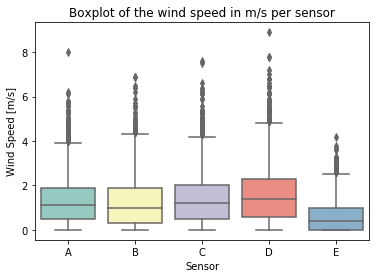

In [66]:
ax = sns.boxplot(data=Wind_speed, palette="Set3")
ax.set(xlabel = 'Sensor', ylabel = 'Wind Speed [m/s]', 
      title = 'Boxplot of the wind speed in m/s per sensor')
plt.savefig('Boxplot of wind speed')

In [32]:
Temperature = pd.concat([sensor_a['Temperature'], sensor_b['Temperature'], sensor_c['Temperature'],
                       sensor_d['Temperature'], sensor_e['Temperature']], 
                       axis=1, keys=['A', 'B', 'C', 'D', 'E'])

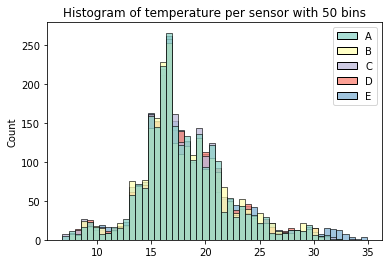

In [59]:
ax = sns.histplot(data=Temperature, bins = 50, palette="Set3")
ax.set(title = 'Histogram of temperature per sensor with 50 bins')
plt.savefig('Histogram of temperature per sensor with 50 bins')

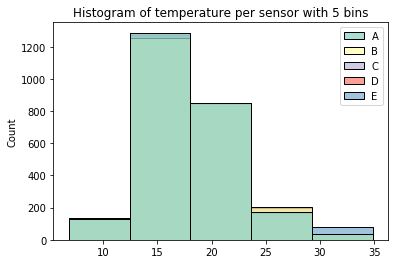

In [57]:
ax = sns.histplot(data=Temperature, bins = 5, palette="Set3")
ax.set(title = 'Histogram of temperature per sensor with 5 bins')
plt.savefig('Histogram of temperature per sensor with 5 bins')

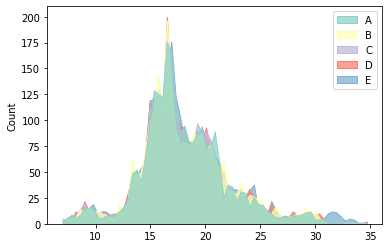

In [56]:
ax = sns.histplot(data=Temperature, element = 'poly', palette="Set3")
plt.savefig('polygon hist temperature')

In [35]:
wind_direction = pd.concat([sensor_a['Direction ‚ True'], sensor_b['Direction ‚ True'], 
                        sensor_c['Direction ‚ True'], sensor_d['Direction ‚ True'], 
                        sensor_e['Direction ‚ True']], 
                       axis=1, keys=['A', 'B', 'C', 'D', 'E'])

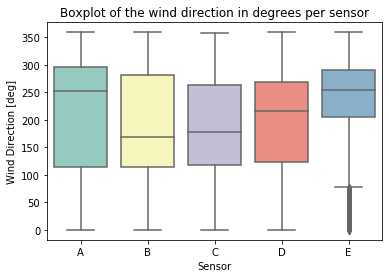

In [55]:
ax = sns.boxplot(data=wind_direction, palette="Set3")
ax.set(xlabel = 'Sensor', ylabel = 'Wind Direction [deg]',
      title = 'Boxplot of the wind direction in degrees per sensor')
plt.savefig('Boxplot of the wind direction in degrees per sensor') 

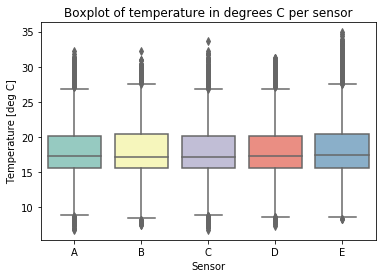

In [60]:
ax = sns.boxplot(data=Temperature, palette="Set3")
ax.set(xlabel = 'Sensor', ylabel = 'Temperature [deg C]', 
       title = 'Boxplot of temperature in degrees C per sensor')
plt.savefig('Boxplot of temperature per sensor') 

## A2